##Deep Neural Network(DNN) model

**Objective:** To implement DNN starting from simple to complex model. Avoid under fitting and over fitting. Analyse the train test graphs to figure out the right complexity of the model and to fix the epochs / stopping criteria. Try all hyper parameter tunings and come up with the best optimal model which works for your data.

**Data source**: [MNIST dataset - Image classification](https://www.kaggle.com/datasets/oddrationale/mnist-in-csv) from Kaggle

**Libraries used:**
  1. Numpy
  2. Pandas
  3. Tensorflow
  4. Sciket-learn
  5. Matplotlib
  6. Seaborn

###**Importing required libraries**

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

###**Data Loading and Preprocessing**
 - Loading train and test MNIST datasets.
 - Seperating the features and labels as X and Y.
 - Due to the complexity and size of big data, train and test datasets are normalized within an specified scale that it fits well and from which the data is reshaped. Hence, all the columns are in same shape.

In [ ]:
# Data Loading and Preprocessing
def load_and_preprocess_data():
    train_data = pd.read_csv('mnist_train.csv')
    test_data = pd.read_csv('mnist_test.csv')

    # Separate features and labels
    X = train_data.drop('label', axis=1).values
    y = train_data['label'].values
    X_test = test_data.drop(test_data.columns[0], axis=1).values / 255.0

    # Normalize and reshape data
    X = X / 255.0
    X = X.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)

    # Train-validation split
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    return X_train, X_val, X_test, y_train, y_val

###**Creating three sub DNN models under creation of MNISTCLassifier class**
  - Creating three DNN models based on Flatten and Dense layers, increasing set of neurons and activation functions as
     - Simple dnn model: One hidden layer with dropout of 0.2
     - Moderate dnn model: Two hidden layers with slightly decreasing dropouts and batch normalization
     - Complex dnn model: Three hidden layers with even slightly decreasing orderly dropouts and batch normalization

In [ ]:
# Model Architectures
class MNISTClassifier:
    def simple_dnn_model(self):
        model = models.Sequential([
            layers.Flatten(input_shape=(28, 28, 1)),
            layers.Dense(128, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(10, activation='softmax')
        ])
        return model

    def moderate_dnn_model(self):
        model = models.Sequential([
            layers.Flatten(input_shape=(28, 28, 1)),
            layers.Dense(256, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            layers.Dense(128, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(10, activation='softmax')
        ])
        return model

    def complex_dnn_model(self):
        model = models.Sequential([
            layers.Flatten(input_shape=(28, 28, 1)),
            layers.Dense(512, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.4),
            layers.Dense(256, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            layers.Dense(128, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(10, activation='softmax')
        ])
        return model

##**Evaluating the tuned DNN model with performance metrics**
- Evaluation metrics used:
    1. Classification report
    2. Confusion matrix

- Presenting the classification report with required metrics such as precision, accuracy, recall, f1-score and support.
- Evaluating and displaying the visual representation of DNN model's final performance after running through 50 epochs at each batch size with suitable learning rate of 0.01.
- Used Early Stopping with patience of 5 for to restrict the model from training further epochs if it detects that the accuracy stops improving or increasing at a start point.

In [ ]:
# Training and evaluation phase of DNN model
def train_evaluate_model(model_fn, X_train, y_train, X_val, y_val, params, model_name):

    model_params = params.copy()

    model_params.pop('model_fn', None)
    model = model_fn()
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=params['learning_rate']),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    callbacks = [
        EarlyStopping(patience=5, restore_best_weights=True),
        ReduceLROnPlateau(factor=0.5, patience=3)
    ]

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50, batch_size=params['batch_size'],
        callbacks=callbacks, verbose=1
    )

    # Plot accuracy and loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()

    plt.show()

    # Performance metrics
    val_predictions = model.predict(X_val).argmax(axis=1)
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_val, val_predictions))

    print(f"Confusion Matrix for {model_name}:\n")
    cm = confusion_matrix(y_val, val_predictions)
    ConfusionMatrixDisplay(cm).plot(cmap='Blues')
    plt.show()

    return model, history

###**Performing Hyperparameter Tuning process after DNN build phase**
 - Learning rate is decided and given as the same 0.001, 0.001 and 0.001. It is given for the model to train well and give a better performance accuracy.
 - Batch sizes are added as 64, 128 and 128 for three models (basic, moderate and complex) to train the model at regionable batch sizes.
 - Iterates over different configurations for dropout rates, learning rates, and batch sizes.
 - Tracks the best-performing model from among three DNN models


The Dense Neural Network training begins now for each of the three sub DNN models........


Training simple_dnn_model with params: {'model_fn': <bound method MNISTClassifier.simple_dnn_model of <__main__.MNISTClassifier object at 0x7ffb1368d480>>, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 128}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7904 - loss: 0.7226 - val_accuracy: 0.9363 - val_loss: 0.2284 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9352 - loss: 0.2233 - val_accuracy: 0.9530 - val_loss: 0.1642 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9505 - loss: 0.1725 - val_accuracy: 0.9617 - val_loss: 0.1344 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9611 - loss: 0.1335 - val_accuracy: 0.9638 - val_loss: 0.1204 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9673 - loss: 0.1131 - val_accuracy: 0.9665 - val_loss: 0.1121 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9713 - loss: 0.0957 - val_accuracy: 0.9712 - val_loss: 0.0984 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9745 - loss: 0.0846 - 

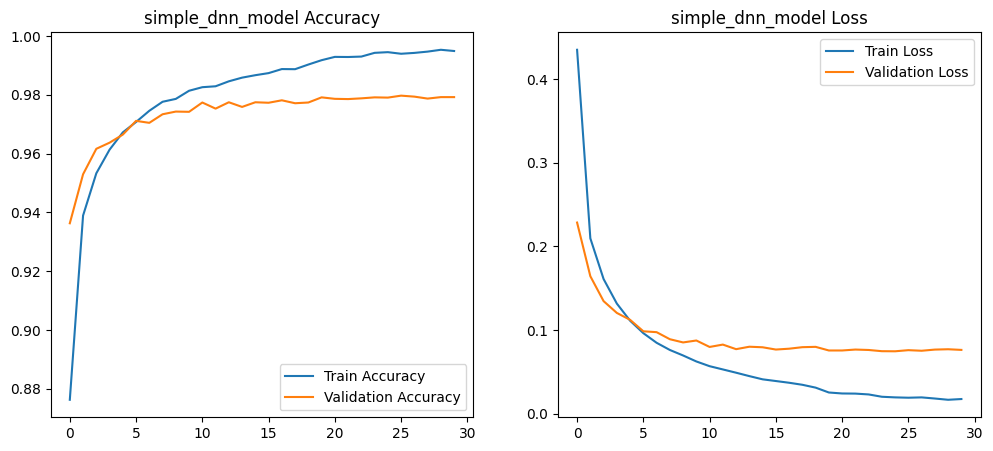

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report for simple_dnn_model:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1185
           1       0.99      0.99      0.99      1348
           2       0.97      0.98      0.97      1192
           3       0.98      0.96      0.97      1226
           4       0.99      0.98      0.98      1168
           5       0.98      0.98      0.98      1084
           6       0.99      0.99      0.99      1184
           7       0.98      0.98      0.98      1253
           8       0.97      0.97      0.97      1170
           9       0.97      0.97      0.97      1190

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000

Confusion Matrix for simple_dnn_model:



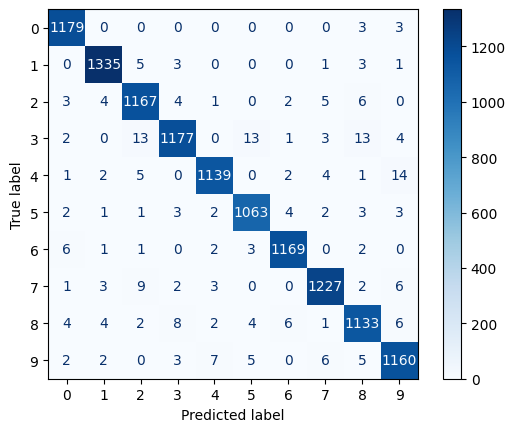

The Dense Neural Network training begins now for each of the three sub DNN models........


Training moderate_dnn_model with params: {'model_fn': <bound method MNISTClassifier.moderate_dnn_model of <__main__.MNISTClassifier object at 0x7ffb1368d480>>, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'batch_size': 128}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8290 - loss: 0.5535 - val_accuracy: 0.9553 - val_loss: 0.1510 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9495 - loss: 0.1634 - val_accuracy: 0.9662 - val_loss: 0.1133 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9625 - loss: 0.1178 - val_accuracy: 0.9715 - val_loss: 0.0936 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9680 - loss: 0.1001 - val_accuracy: 0.9711 - val_loss: 0.0965 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9728 - loss: 0.0862 - val_accuracy: 0.9775 - val_loss: 0.0789 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9760 - loss: 0.0735 - val_accuracy: 0.9768 - val_loss: 0.0763 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9792 - loss: 0.0650 - 

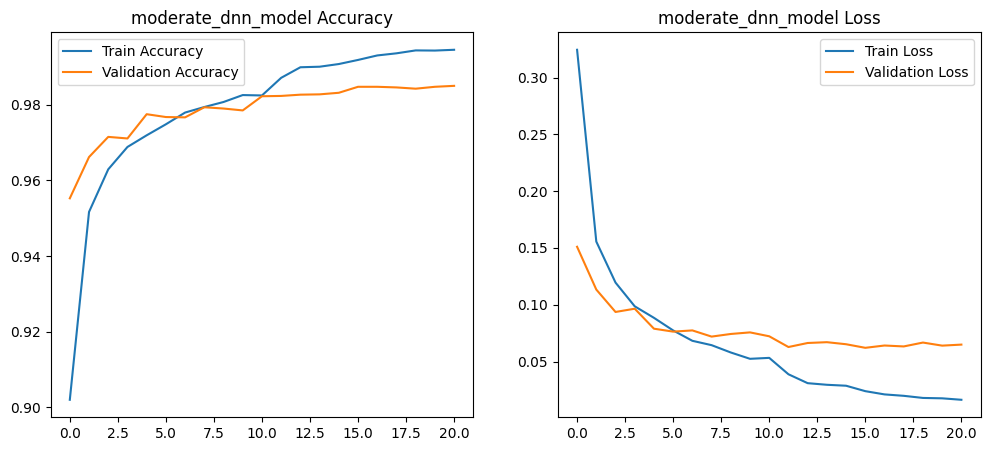

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Classification Report for moderate_dnn_model:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1185
           1       0.99      0.99      0.99      1348
           2       0.98      0.99      0.98      1192
           3       0.99      0.98      0.98      1226
           4       0.98      0.99      0.99      1168
           5       0.98      0.98      0.98      1084
           6       0.99      0.98      0.99      1184
           7       0.98      0.98      0.98      1253
           8       0.98      0.98      0.98      1170
           9       0.99      0.98      0.98      1190

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000

Confusion Matrix for moderate_dnn_model:



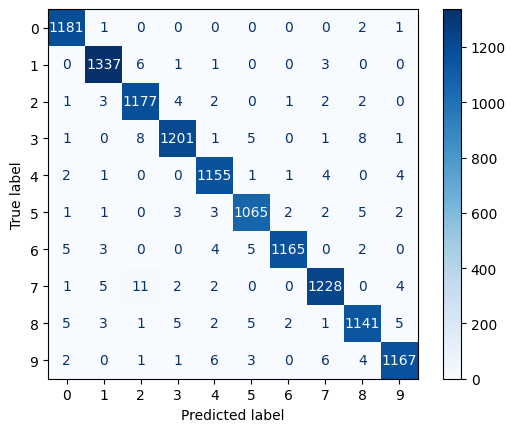

The Dense Neural Network training begins now for each of the three sub DNN models........


Training complex_dnn_model with params: {'model_fn': <bound method MNISTClassifier.complex_dnn_model of <__main__.MNISTClassifier object at 0x7ffb1368d480>>, 'dropout_rate': 0.4, 'learning_rate': 0.001, 'batch_size': 64}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8222 - loss: 0.5739 - val_accuracy: 0.9562 - val_loss: 0.1407 - learning_rate: 0.0010
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9423 - loss: 0.1847 - val_accuracy: 0.9677 - val_loss: 0.1041 - learning_rate: 0.0010
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9536 - loss: 0.1505 - val_accuracy: 0.9682 - val_loss: 0.1029 - learning_rate: 0.0010
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9592 - loss: 0.1314 - val_accuracy: 0.9733 - val_loss: 0.0884 - learning_rate: 0.0010
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9665 - loss: 0.1073 - val_accuracy: 0.9757 - val_loss: 0.0862 - learning_rate: 0.0010
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9681 - loss: 0.1000 - val_accuracy: 0.9797 - val_loss: 0.0696 - learning_rate: 0.0010
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9687 - loss: 0.0946 - 

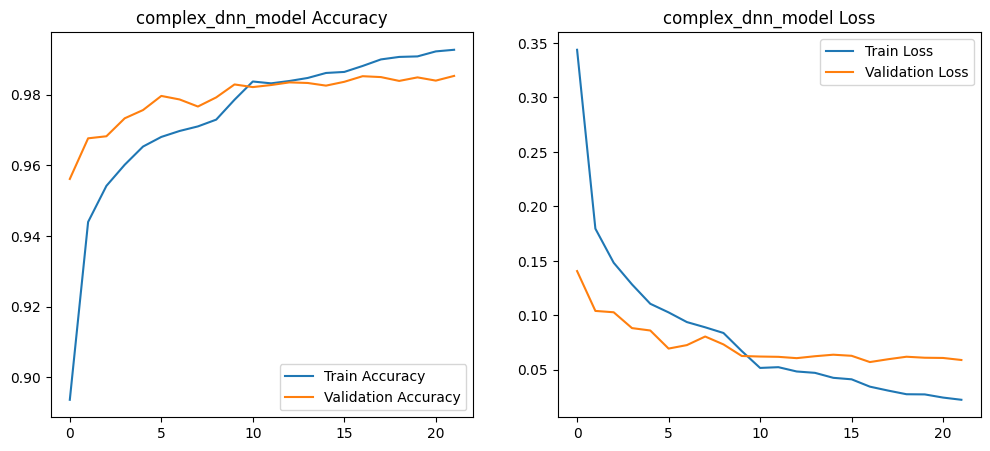

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Classification Report for complex_dnn_model:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1185
           1       0.99      1.00      0.99      1348
           2       0.98      0.99      0.98      1192
           3       0.99      0.98      0.98      1226
           4       0.98      0.99      0.99      1168
           5       0.99      0.98      0.98      1084
           6       0.99      0.99      0.99      1184
           7       0.99      0.98      0.98      1253
           8       0.97      0.98      0.97      1170
           9       0.98      0.98      0.98      1190

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000

Confusion Matrix for complex_dnn_model:



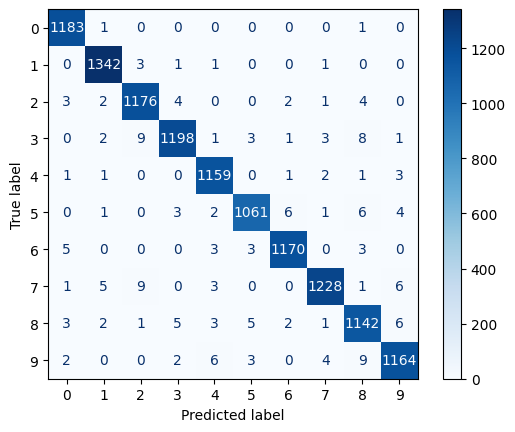

Best Model: complex_dnn_model
Best Validation Accuracy: 0.9853


In [ ]:
def hyperparameter_tuning():
    X_train, X_val, X_test, y_train, y_val = load_and_preprocess_data()
    classifier = MNISTClassifier()
    hyperparams = [
        {"model_fn": classifier.simple_dnn_model, "dropout_rate": 0.2, "learning_rate": 0.001, "batch_size": 128},
        {"model_fn": classifier.moderate_dnn_model, "dropout_rate": 0.3, "learning_rate": 0.001, "batch_size": 128},
        {"model_fn": classifier.complex_dnn_model, "dropout_rate": 0.4, "learning_rate": 0.001, "batch_size": 64}
    ]
    best_model = None
    best_accuracy = 0
    best_params = None

    for params in hyperparams:
        print(f"The Deep Neural Network training after tuning phase begins now for each of the three sub DNN models........\n")
        print(f"\nTraining {params['model_fn'].__name__} with params: {params}")
        model, history = train_evaluate_model(
            params["model_fn"], X_train, y_train, X_val, y_val, params, params["model_fn"].__name__
        )
        val_accuracy = max(history.history['val_accuracy'])
        if val_accuracy > best_accuracy:
            best_model = model
            best_accuracy = val_accuracy
            best_params = params

    print(f"Best Model: {best_params['model_fn'].__name__}")
    print(f"Best Validation Accuracy: {best_accuracy:.4f}")
    return best_model

# Main Execution
if __name__ == "__main__":
    best_model = hyperparameter_tuning()

###**Called the main function and all sub functions under the main function**
- Displaying the final results with number of epochs undergone based on learning rate and batch size.
- Presenting the classification report with required performance metrics such as precision, accuracy, recall, f1-score and support.
- Evaluating and displaying the visual representation of DNN model's final performance after running through 50 epochs at each batch size with suitable learning rate of 0.01,0.01 and 0.01.
- The model is to be trained from suitable capacity and training time for to get a good generalization performance.

##**DNN model summary and statistics:**
- Created and analyzed the three DNN models by using its classification report and confusion matrix.
- Through each cycle of epochs, the model was assessed and tested of upto 50 epochs based on the learning rate and batch size.
- Observation was made that validation accuracy was increasing with response to increase in number of epoch. And the positive analysis was that validation loss and loss was decreasing subsequently when epoch cycle was in motion.
- Here are the below statistics summary of the performance report of three DNN models and the model with right complexity is shown below,
       - Simple Deep Neural Network model:
           - Accuracy: 98%
           - Loss: 0.01
           - Accuracy after validation: 97.93%
           - Loss after validation:  0.07
       - Moderate Deep Neural Network model:
           - Accuracy: 98%
           - Loss:  0.01
           - Accuracy after validation: 98.50%
           - Loss after validation: 0.06
       - Complex Deep Neural Network model:
           - Accuracy: 99%
           - Loss: 0.02
           - Accuracy after validation: 98.53%
           - Loss after validation: 0.05

- **Based on above metrics report, the right complexity of the model is choosen and mentioned here,**
    - The best optimal DNN model with better accuracy depending upon its loss complexity and validation phase after tuning is
        - Complex Deep Neural Network model:
                Validation accuracy: 98.53%
                Model final accuracy: 99.3%

      